In [125]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.interpolate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import gray_codes as gray



In [126]:
def n_likes(n, array):
    return [n]*len(array)

def generate_gray(n):
    if (n<=0):
        return ['0']
    if (n==1):
        return ['0','1']
    # call recursion
    rec_ans = generate_gray(n-1)

    main_ans = []

    # Add 0 to first half
    for i in range(len(rec_ans)):
        sym = rec_ans[i]
        main_ans.append("0" + sym)
    # Add 1 to second half(mirrored)
    for i in range(len(rec_ans)-1, -1, -1):
        sym = rec_ans[i]
        main_ans.append("1" + sym)
    
    return main_ans

# This method convery binary to gray code
# Pass n e.g 100 or '100'
def convert_bin_to_gray(n):
    n = int(str(n), 2)
    n ^= (n >> 1)
    return bin(n)

 # This method convert gray code to binary 
def convert_gray_to_bin(n):
    n = int(str(n),2)
    mask = n
    while n!=0:
        mask = mask >> 1
        n ^= mask
    return bin(n)

Задаем число поднесущих

In [127]:
N = 4 # OFDM Sub Carriers
T = 1 # Period
k = 2 # nubmer of bits
Fn = 1000


Data Carriers:  [0 1 2 3]


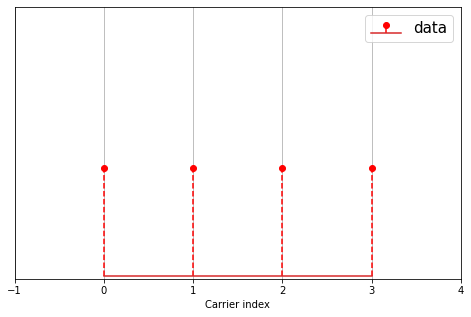

In [128]:
all_carriers = np.arange(N)  # indices of all subcarriers ([0, 1, ... K-1])

data_carriers = all_carriers

print ("Data Carriers:  %s" % data_carriers)
plt.figure(figsize=(8,5))

plt.stem(data_carriers, n_likes(4, data_carriers), use_line_collection=True,  linefmt="r--",  markerfmt='ro', label='data',)
plt.legend(fontsize=10, ncol=2, prop={'size': 15})
plt.xlim((-1,N)); plt.ylim((-0.1, 10))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True);

In [129]:
mu = 2 # bits per symbol
payloadBits_per_OFDM = len(data_carriers)*mu  # number of payload bits per OFDM symbol
print(payloadBits_per_OFDM)

bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM))

print ("Bits count: ", len(bits))
print ("Random sequence: ", bits)
print ("Mean of bits (should be around 0.5): ", np.mean(bits))

8
Bits count:  8
Random sequence:  [0 1 1 1 1 0 0 1]
Mean of bits (should be around 0.5):  0.625


In [130]:
def SP(bits):
    return bits.reshape((len(data_carriers), mu))
bits_SP = SP(bits)
print (bits_SP)

[[0 1]
 [1 1]
 [1 0]
 [0 1]]


Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 11 to GRAY: 0b10
2
Convert BINARY: 10 to GRAY: 0b11
3
Convert BINARY: 01 to GRAY: 0b1
1
Convert BINARY: 01 to GRAY: 0b1
1


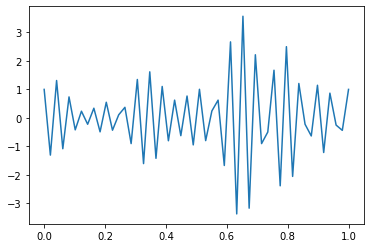

In [131]:
def convert_bit_arr_to_gray(bits):
   bits_str = ''.join(map(str, bits))
   gray_code = convert_bin_to_gray(bits_str)
   print('Convert BINARY: {0} to GRAY: {1}'.format(bits_str, gray_code))
   return gray_code

def convert_binary_to_decimal(binary):
   return int(binary, 2)

def from_seq_to_sig(t, bits, gray=False):
   sum = 0.0
   for i in range(0, N ):
      if gray:
         Mb_i = convert_binary_to_decimal(convert_bit_arr_to_gray(bits[i])) 
      else:
         Mb_i = convert_binary_to_decimal(bits[i])   
      print(Mb_i)
      a = (Fn + i/T)*t
      sum += np.sin(2*np.pi*(Fn + (i/T))*t + Mb_i*np.pi/2)
   return sum
   
t = np.linspace(0, 1)
somearr = list()

for time in t:
   somearr.append(from_seq_to_sig(time, bits_SP, True))

print(somearr)

plt.plot(t, somearr)
plt.show()
# for item in bits_SP:
#    gray_code_bin = convert_bit_arr_to_gray(item)
#    print(gray_code_bin)
#    gray_code_decimal = convert_binary_to_decimal(gray_code_bin)
#    print(gray_code_decimal)

   



